#### Neural networks vs. traditional ML models

* The traditional ML models like linear and logistic regression received a significant development in the past decade, but they are unable to scale well with and take effective advantage of all currently available data (big data). 
* The neural networks (NNs) outperform many of the traditional ML models.
  * Both small NNs and medium-sized NNs show better performance on the same amount of data than traditional ML  models.
  * A very large NN, meaning one with many layers of artificial neurons, will outperform all other models and for some applications its performance will just keep on going up with more data.
* For a certain class of applications, if you're able to train a very large neural network to take advantage of the huge amount of data available, sometimes referred with the term big data, then you could attain performance on anything ranging from speech recognition, to image recognition, to natural language processing applications and many more, that is just not possible with earlier generations of learning algorithms. 
* The development of faster CPUs and the rise of GPUs as a really powerful tool for deep learning, is the major force allowing deep learning algorithms to become what they are today.
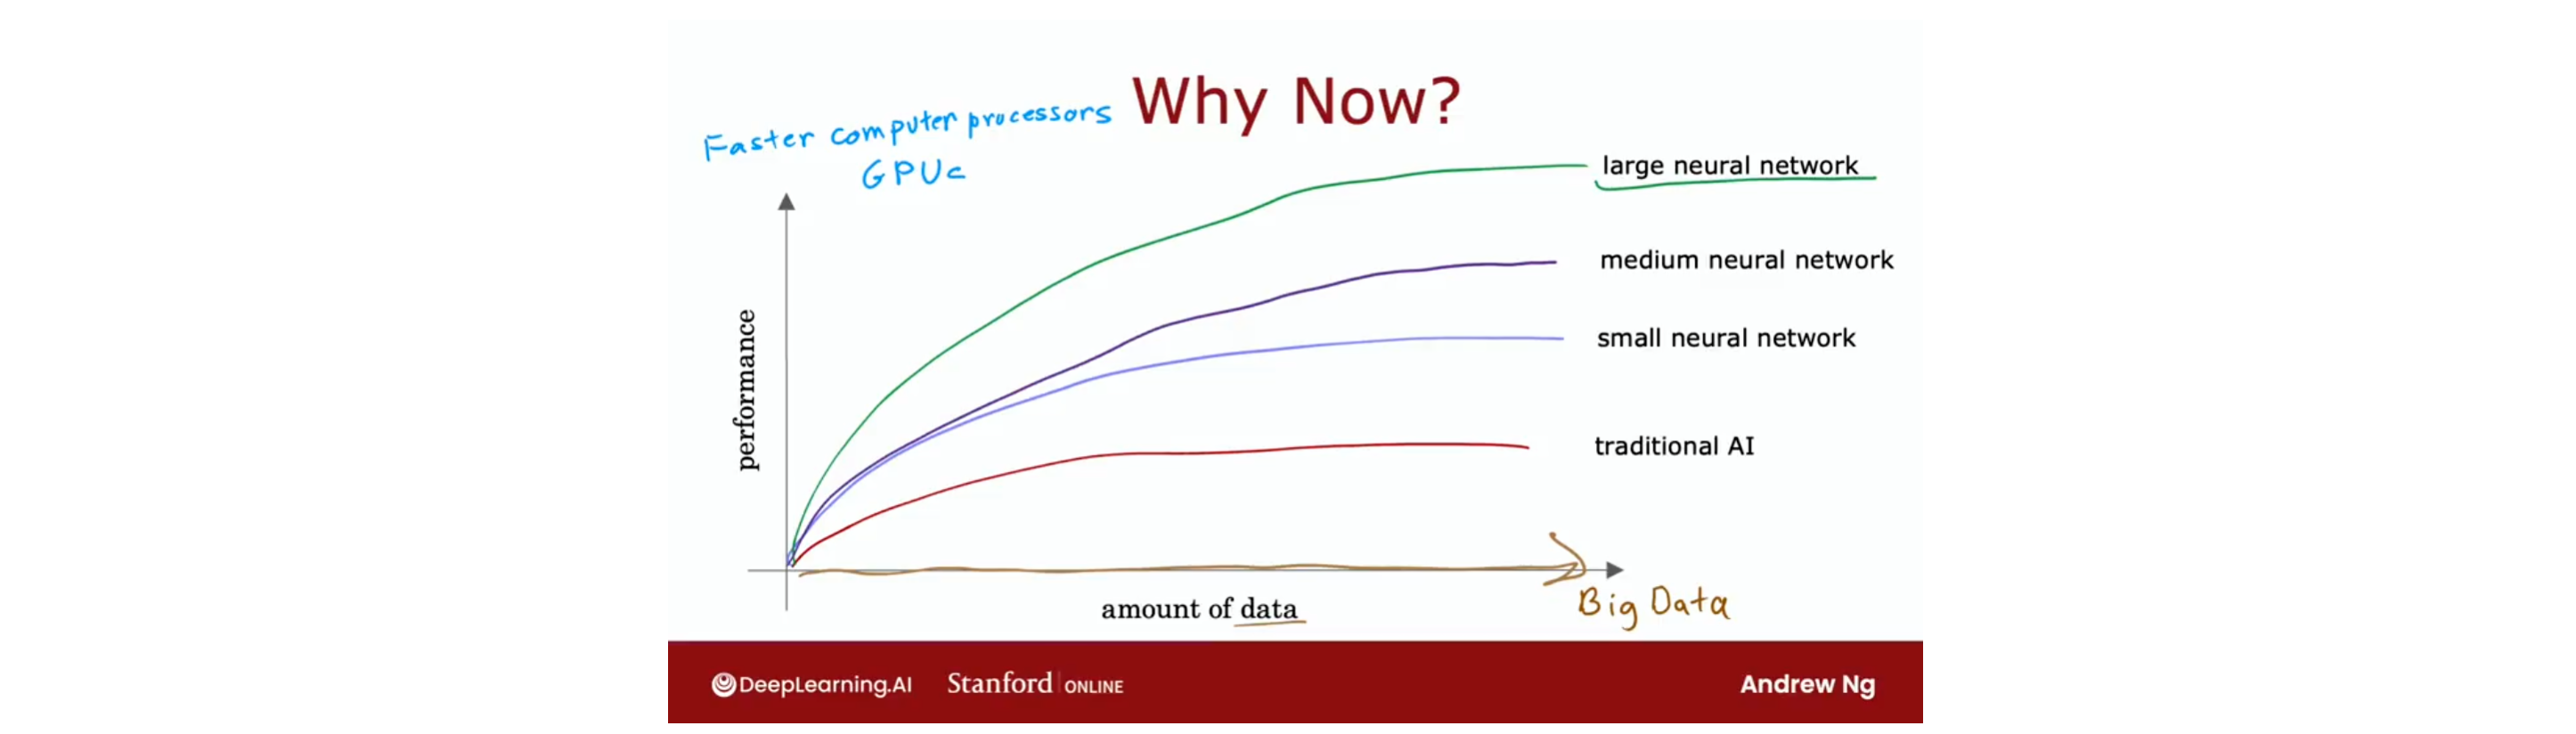

#### Basics of NNs

* A neuron is just a function, that take a vector of all input values and computes an activation value as output.  
* A layer is a group of neurons that process the same input values in parallel. The collective output of the layer is a vector of activation values. This output is then passed to each neuron of the next layer in the network, and so on, untill the output layer is reached.
* It is possible to assign different activation functions to each neuron in the same layer, but this is rarely used in real-world NNs because it's harder to optimize, and rarely more effective than using a single function per layer.
* Weights are numeric values assigned to the connections between neurons, which control the strength and direction of those connections. Every connection between two neurons in adjacent layers has a weight. Weights are the core trainable parameters of every NN.
* During training the activation values are computed through the forward propagation (forward pass). Weights are fixed during forward proopagation and then updated through the back propagation.
* A neural network is basically a chain of transformations at each layer: input → weighted sum → activation function → output, where:
    * Inputs are multiplied by weights.
    * Bias is added to the weighted sum (another trainable parameter).
    * An activation function is applied to the result to produce an activation value as output.
    * The output then becomes input to the next layer.
* How many layers and how many neurons per layer is a question of the architecture of the NN. The number of hidden layers and the number of hidden units (neurons) have an impact on the performance. Multi-layer NNs are sometimes called multilayer perceptron.
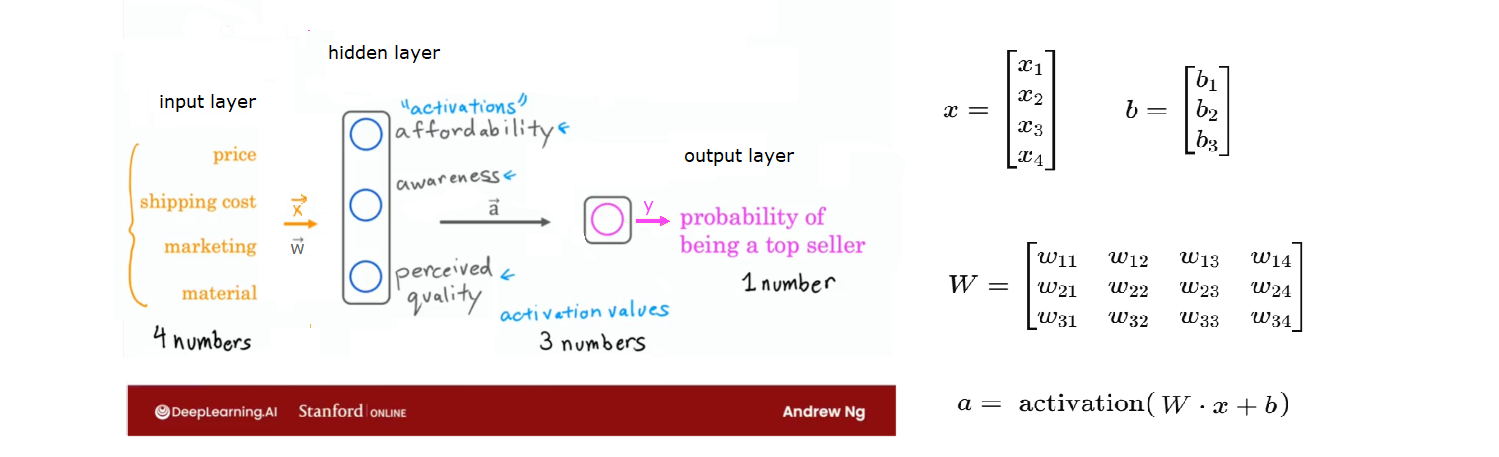

#### Activation functions

* The most widely used activation functions are: ReLu, Sigmoid, Linear, Softmax.
* Depending on what the target label is (or the ground truth label), there will be often only one fairly natural choice for activation function for the output layer.
* Sigmoid can be used when modeling a binary output - either true or false
  * example: output should be yes or no, 0 or 1
* ReLu models an output that can be any non-negative number. It is non-linear i.e. has off-range when z<0, but otherwise provides continues linear relationship similar to regression. It is the most used activation function for the outer layers, because it is faster then sigmoid - does not have flatten parts (if the activation function goes flat, Gradient descent becomes really slow)
  * example: predicting house prices, hence alwyas >0
* Linear activation function is also called "no activation function" and can model any value (negative or postive number). Not be used for hidden layers.
  * example: how will tomorrow stock praces change compared to past, up or down
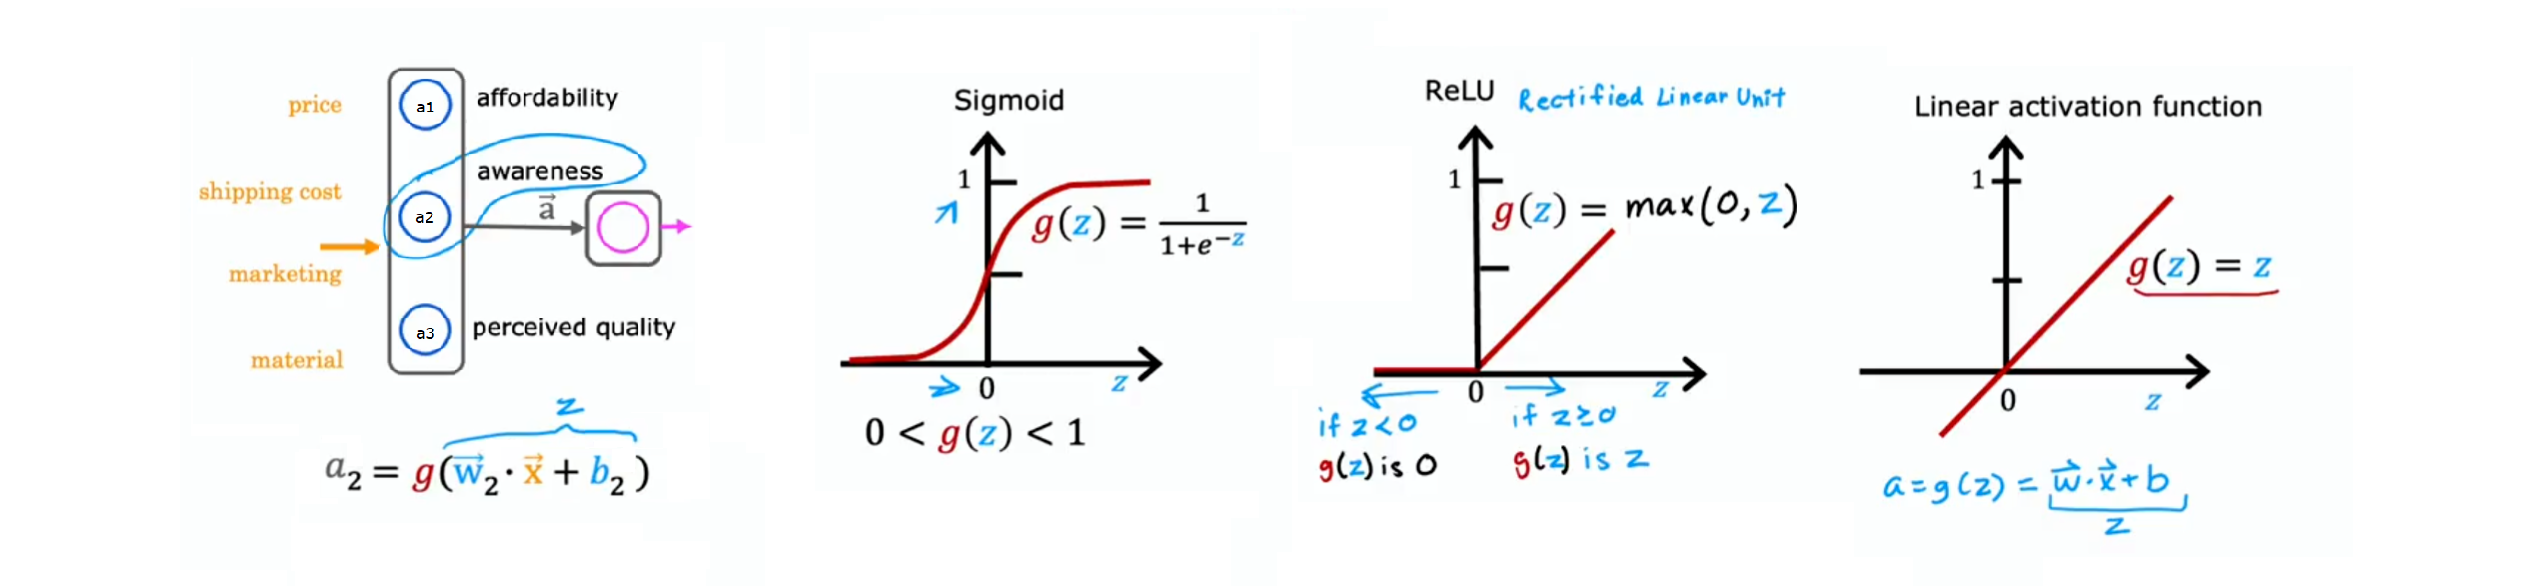

* Why do we need a non-linear activation function for the hidden layers?
  * From the linear algebra: linear f(linear f(x)) = linear f(x) i.e. a linear function of a linear function is itself a linear function. Therefore a NN build with 2 linear hidden layers acts as a simple linear regression and there is no point in using hidden layers, as it can not learn anything more complex than linear regression.
  * Also NN constructed with several hidden linear layers and an output layer with sigmoid activation behaves equivalently to a single sigmoid layer.
  * Therefore linear activation function is not used for hidden layers, as it has no effect on learning.

#### Back propagation 

* For each layer and each neuron, the $w$ and $b$ parameters are optimized during training with the familiar formulas of Gradient descent:
<br> $ w = w - \alpha \frac{d}{dw} J(w,b) $
<br> $ b = b - \alpha \frac{d}{db} J(w,b) $
* To compute partial derivatives of the cost function $J$, Gradient descent uses "back propagation" - a sequence of right to left calculations, based on the "chain rule" from calculus.
* Back propagation is effective: if we have a computation graph with N nodes and P parameters, we can computed the derivatives in roughly N+P steps, rather than NxP steps. This really matters in NNs, where  you can have tens of thousands of nodes and parameters.
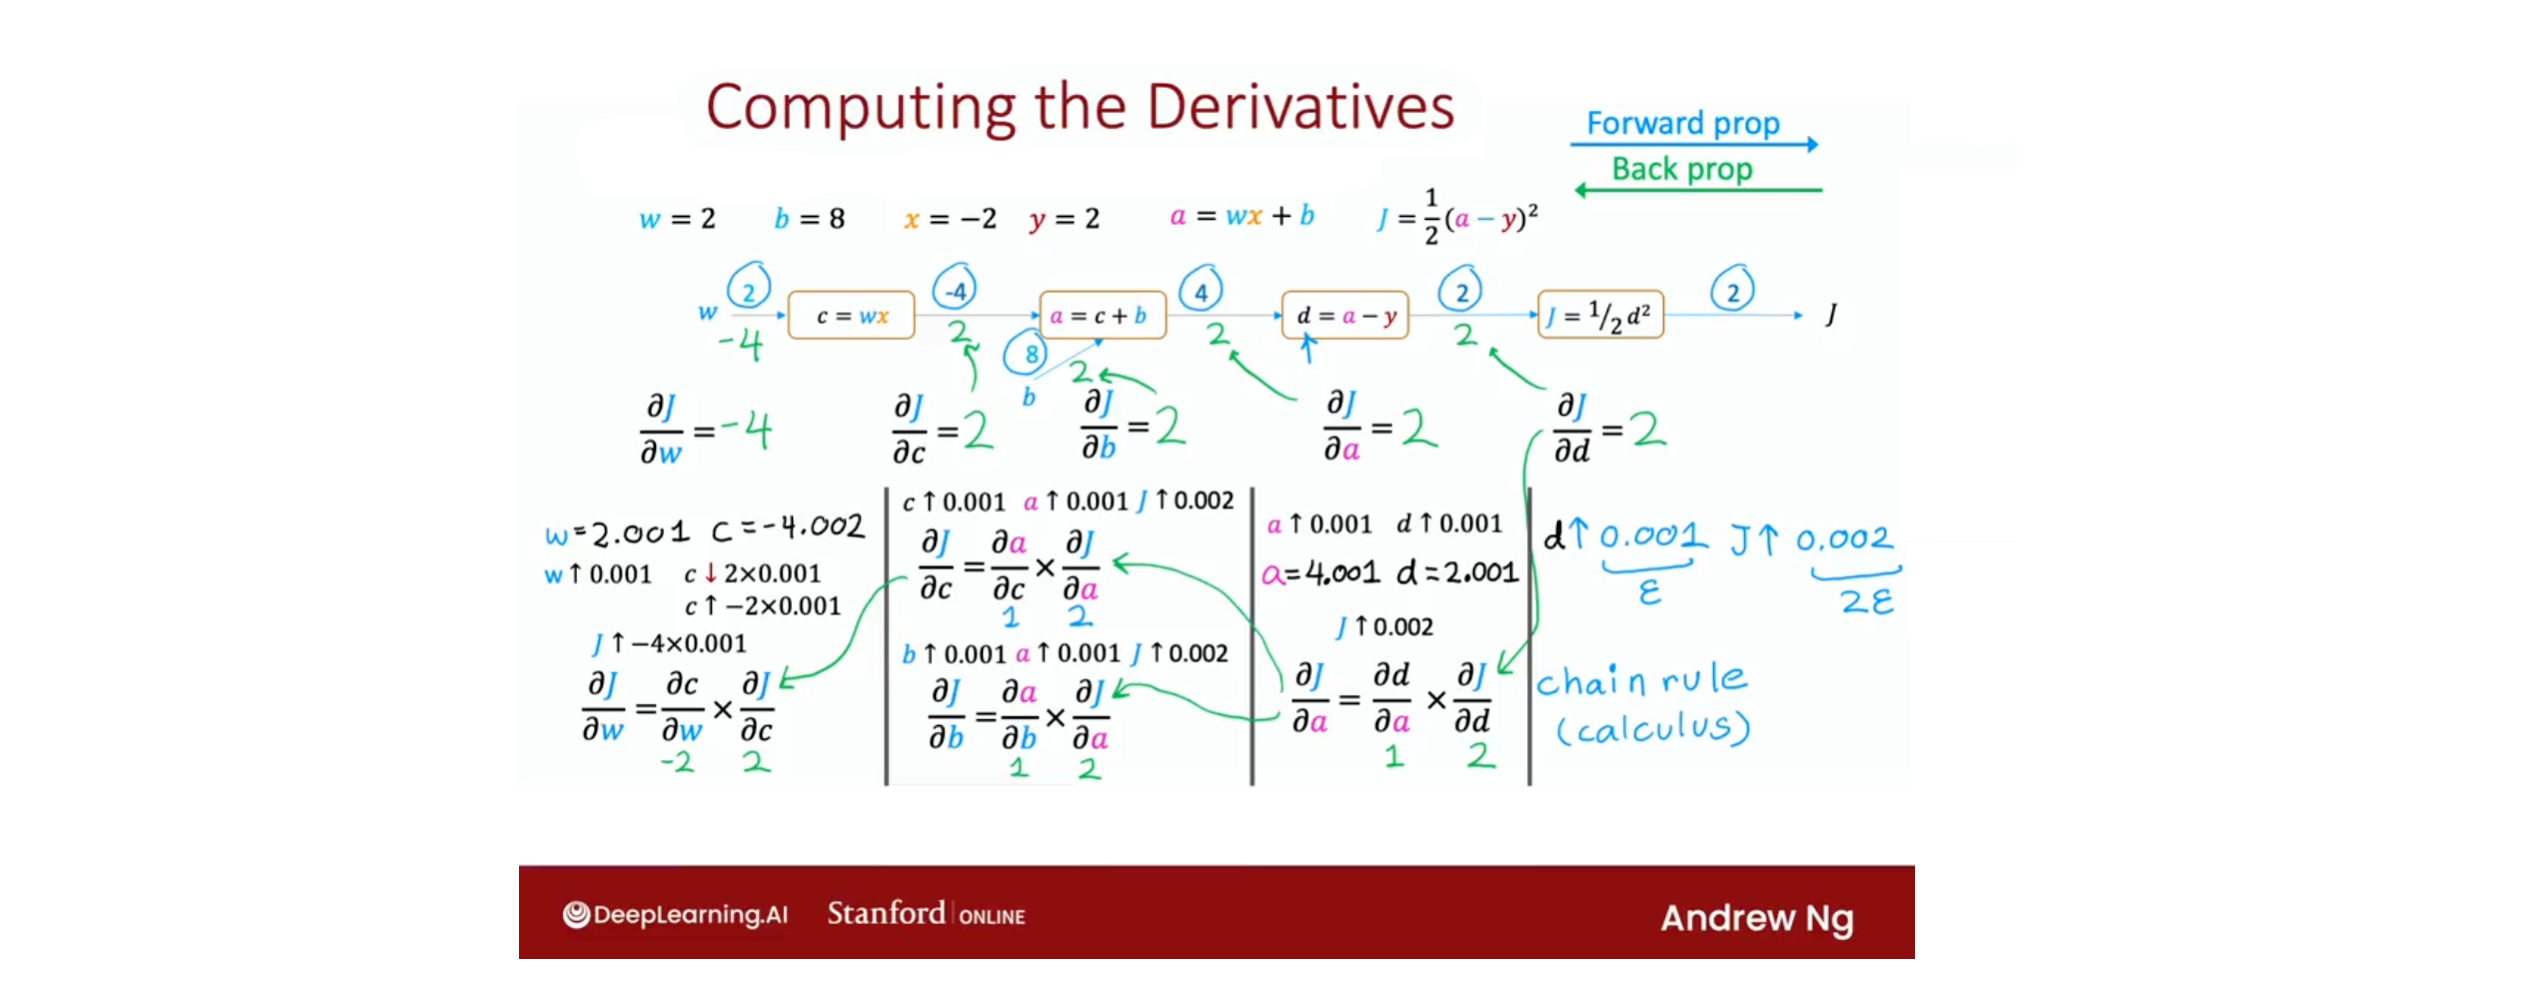  

#### Gradient descent (GD) vs. Adam

* Adam = adaptive movement estimation - used instead of GD for optimization of parameters $w$ and $b$
* Works by applying different learning rate $\alpha$ for every parameter $w$ of the model.
* Compared to the original GD algorithm, the Adam optimizer will adapt $\alpha$ automatically and therefore is more robust to the exact choice of $\alpha$ at the beginning. However it is still worth tunning this parameter to see what would help speed up learning.
* <u>Example</u>:
<br> $ w_1 = w_1 - \alpha_1 \frac{d}{dw_1} J(w,b) $
<br> .....
<br> $ w_9 = w_9 - \alpha_9 \frac{d}{dw_9} J(w,b) $  
<br> $ b = b - \alpha_{10} \frac{d}{db} J(w,b) $
<br><br>
* If the algorithm "sees" that any of the parameters $w_j$ or $b$ keeps on oscillating, bouncing back and forth - that means we take too large steps and the corresponding learning rate $\alpha$ will be reduced.
* If $w_j$ or $b$ keeps on moving in the same direction, it can try increasing $\alpha$ to speed up convergence - in case we are taking tiny little steps in similar direction.
